# **Etapas del modelo analítico**

## **1. Entendimiendo del problema**

Sobrevivientes Titanic

## **2. Extracción de los datos**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos del Titanic desde la URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Varabiales Data set Titanic:

*   **PassengerId :** Id de pasajeros.
*   **Survived**: (0 = No; 1 = Yes).
*   **Pclass:** Clase de pasajeros (1 = 1st; 2 = 2nd; 3 = 3rd).
*   **Name:** Nombre.
*   **Sex:** Género (male = masculino, female = femenino).
*   **SibSp:** Number of Siblings/Spouses Aboard, Número de hermanos / cónyuges a bordo.
*   **Parch:** Number of Parents/Children Aboard, Número de padres/niños a bordo.
*   **Ticket:** Número de Ticket.
*   **Fare:** Tarifa.
*   **Cabin:**	Cabina.
*   **Embarked:** Embarque (C = Cherburgo; Q = Queenstown; S = Southampton)


¿Cuáles son los campos medidas y dimensiones?

*   Medidas = Age, Fare, Sibsp, Parch
*   Dimensiones = PassengerId, Survived, Cabin, Emarked
Pclass,
Name,


## **3.Limpieza de datos**

### **Identificar datos nulos.**

In [ ]:
print( "estructura dataset:", titanic_data.shape )
titanic_data.info()

estructura dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


¿En qué columnas tenemos datos nulos?

In [ ]:
#Contabilizamos los nulos
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Tratamiento datos nulos**

¿Qué estrategia podemos utilizar para cada columna?

#### **Columna Age**

In [ ]:
#Contabilizar los datos nulos de la columna Age
titanic_data["Age"].isnull().sum()

177

In [ ]:
#Medidas estadística de Age
titanic_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

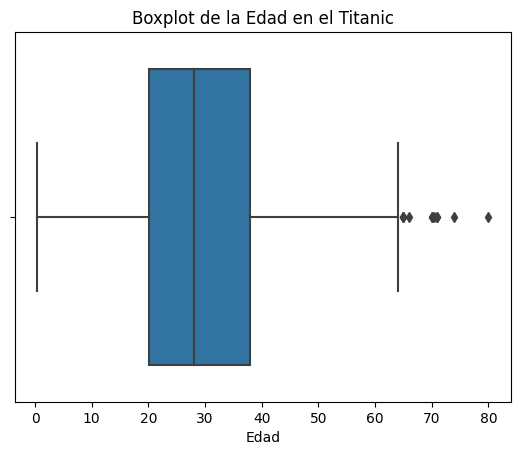

In [ ]:
#Crear boxplot de la columna age para identifcar outliers
sns.boxplot(x= "Age", data =titanic_data)

#Contextualización del gráfico
plt.xlabel('Edad')
plt.title('Boxplot de la Edad en el Titanic')

# Muestra el gráfico
plt.show()


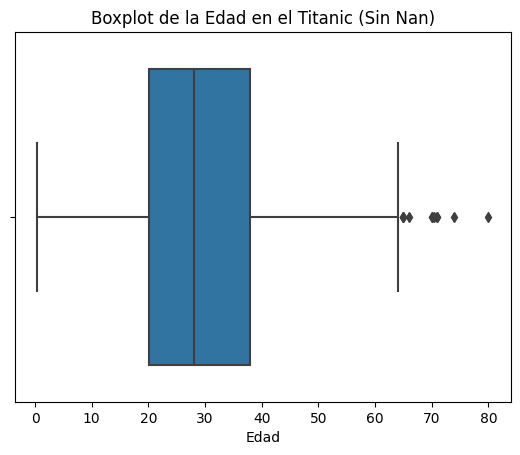

In [ ]:
#Boxplot sin Nan

#Excluimos datos Nan
titanic_data_cleaned = titanic_data.dropna(subset=['Age'])

#Crear boxplot de la columna age para identifcar outliers
sns.boxplot(x= "Age", data =titanic_data_cleaned)

#Contextualización del gráfico
plt.xlabel('Edad')
plt.title('Boxplot de la Edad en el Titanic (Sin Nan)')

# Muestra el gráfico
plt.show()


In [ ]:
#Mediana de la columna Age

median_age= titanic_data['Age'].median()

#Rellenar la columna Age con su mediana
titanic_data['Age'].fillna(median_age, inplace=True)

#Verificar los Nan
print(titanic_data.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### **Columna Cabin**

In [ ]:
#Eliminar columna Cabin ya que la podemos asociar con la columna de Fare (Tarifa)
titanic_data.drop(["Cabin"],axis=1,inplace=True)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### **Columna Embarked**

¿Qué estrtegia podemos utilizar?

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
mode_embarked= titanic_data["Embarked"].mode()
print(mode_embarked)

0    S
Name: Embarked, dtype: object


In [ ]:
# Reemplaza los valores NaN en la columna 'Embarked' por la moda
mode_embarked= titanic_data["Embarked"].mode()[0]

titanic_data['Embarked'].fillna(mode_embarked, inplace=True)
titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **4.Análisis exploratorio de datos (EDA)**

### **Objetos visuales**

Se deben utilizar herramientas de visualización para poder entender comportamientos y patrones en los datos

In [ ]:
#Contabilizar cantidad de pasajeros por género
print( titanic_data['Sex'].value_counts())



male      577
female    314
Name: Sex, dtype: int64


In [ ]:
#Filtrar por sobrevivientes
df_survived =titanic_data[titanic_data["Survived"] == 1]
df_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


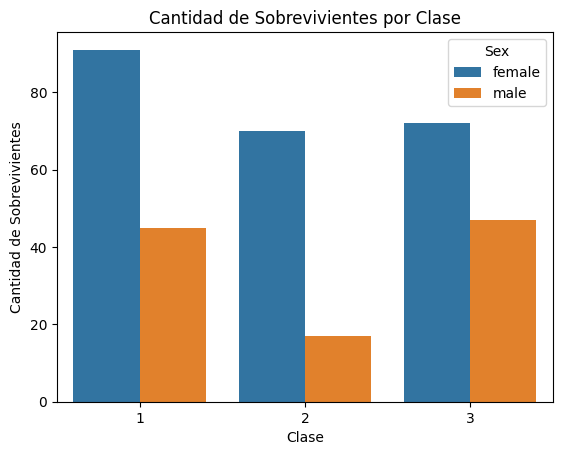

In [ ]:
#Crear un countplot de sobrevivientes por Pclass y por Sex

sns.countplot(x="Pclass", data =df_survived, hue = "Sex")
#Contetxualizando el gráfico
plt.title('Cantidad de Sobrevivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Sobrevivientes')
plt.show()

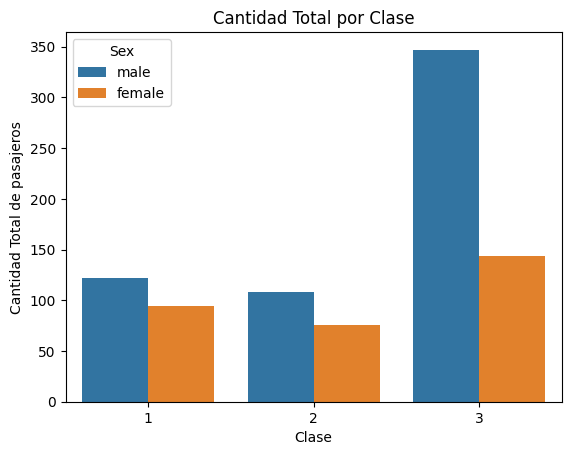

In [ ]:
#Crear un countplot de todos los pasajeros por Pclass y por Sex

sns.countplot(x="Pclass", data = titanic_data, hue = "Sex")
#Contetxualizando el gráfico
plt.title('Cantidad Total por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad Total de pasajeros')
plt.show()

## **5. Selección de variables**

*   También conocido como Feature Selection, consiste en el proceso de seleccionar las características (variables) con más importancia en la variable a predecir.

*   Consiste en elegir un subconjunto relevante y significativo de las características (columnas) del dataset para mejorar el rendimiento del modelo y reducir la complejidad computacional.




### **Eliminación de características irrelevantes o redundantes**

¿Qué características podemos identificar que  que no aporten información relevante?

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Eliminar las columnas irrelevantes Passenger ID, Name, Ticket
titanic_data.drop(["PassengerId","Name", "Ticket"],axis=1,inplace=True) #axis = 1 columnas, inplace = True dentro del df
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### **Transformar etiquetas categóricas en valores numéricos**

¿Qué columnas categóricas podemos transformar?

In [ ]:
print("Valores únicos columna Sex:", titanic_data['Sex'].unique())
print("Valores únicos columna Emarked:", titanic_data['Embarked'].unique())

Valores únicos columna Sex: ['male' 'female']
Valores únicos columna Emarked: ['S' 'C' 'Q']


In [ ]:
# Definir el mapeo de valores categóricos a valores numéricos deseados

#Definir clave valor sex
custom_mapping_sex = {
    'male': 0,
    'female': 1
}

#Definir clave valor embarcación
custom_mapping_embarked = {
    'S': 2,
    'C': 0,
    'Q': 1
}

# Aplicar la transformación con el mapeo personalizado
titanic_data['Sex'] = titanic_data['Sex'].map(custom_mapping_sex)

titanic_data['Embarked'] = titanic_data['Embarked'].map(custom_mapping_embarked)

titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


## **6. Modelamiento**


Este es uno de los procesos más cruciales en el modelado de ciencia de datos, ya que el algoritmo de aprendizaje automático ayuda a crear un modelo de datos utilizable.
Tipos de algoritmos:

* **A.  Aprendizaje supervisado:**

*   **Clasificación:**
1.   Árbol de decisión.
2.   K-Nearest-Neighbor.
3.   Regresión logística.

*   **Regresión**

*  **B. Aprendizaje no supervisado.**




### **Aprendizaje supervisado**

### **Clasificación: Árbol de decisión**

Si la variable dependiente es categórica decimos que es un árbol de clasificación, y si es numérica es un árbol de regresión.

Paso a paso:
1.   Se importan las librerías necesarias.
2.   Se divide el dataset en variables predictoras (X) y variable objetivo (y).
3.   Se divide el dataset en conjuntos de entrenamiento y prueba.
4.   Se crea el modelo de árbol de decisión.
5.   Se entrena el modelo.
6.   Se realizan predicciones en el conjunto de prueba.
7.   Se evalúa el rendimiento del modelo.

In [ ]:
titanic_data.shape

(891, 8)

`from sklearn.model_selection import train_test_split`

Dividir el conjunto de datos en entrenamiento y prueba

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`

**Sintaxis:**

Donde:

*   **X:** Es el conjunto de características o variables independientes del conjunto de datos. Puede ser un DataFrame o una matriz NumPy.
*   **y:** Es la variable objetivo o etiqueta del conjunto de datos. Puede ser una Serie de pandas o un arreglo de una dimensión.
*   **test_size:** Es un valor entre 0 y 1 que representa el tamaño del conjunto de prueba en relación con el conjunto de datos completo. Por ejemplo, test_size=0.2 indica que el 20% de los datos se utilizará como conjunto de prueba, mientras que el 80% restante se utilizará como conjunto de entrenamiento.

*   **random_state:** Es un número entero >=0 que se utiliza como semilla para el generador de números aleatorios. Se recomienda establecer un valor fijo para random_state cuando se quiere obtener siempre la misma división de datos, lo que facilita la comparación de resultados.



La función devuelve cuatro conjuntos de datos resultantes de la división:

*   X_train: Es el conjunto de características para el entrenamiento del modelo.
*   X_test: Es el conjunto de características para la prueba del modelo.
*   y_train: Es la variable objetivo correspondiente al conjunto de entrenamiento.
*   y_test: Es la variable objetivo correspondiente al conjunto de prueba.

In [ ]:
titanic_data["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

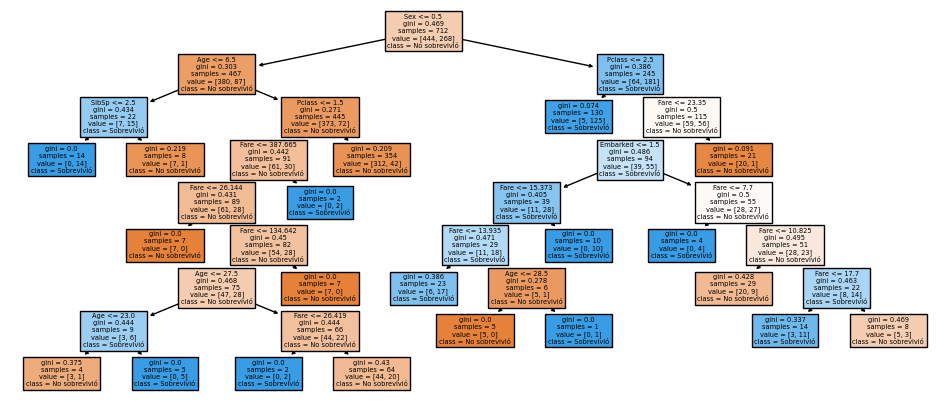

Rendimiento del árbol de decisión con 20 nodos: 0.82


In [ ]:
#Importamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Paso 1: Dividimos el dataset en entrenamiento y prueba.

X = titanic_data.drop('Survived', axis=1) #Todas las columnas del dataset excepto survived
#columnas_variables = ['Sex', 'Fare']
#X= titanic_data[columnas_variables]
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 2 = Crear el árbol de decisión con nodos con 10
model = DecisionTreeClassifier(max_leaf_nodes= 20)

#Paso 3 = Ajuste del modelo
model.fit(X_train, y_train)

#Paso 4: Visualizar árbol de decisión
plt.figure(figsize=(12, 5))
plot_tree(model, feature_names=X.columns, class_names=['No sobrevivió', 'Sobrevivió'], filled=True)
plt.show()

#Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Paso 6: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 20 nodos: {accuracy:.2f}')



` X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`


*   **X_train:** Es el conjunto de características para el entrenamiento del modelo. Contiene el 80% (o el valor especificado por test_size) de las instancias, que se utilizarán para ajustar (entrenar) el modelo.

*  **X_test:** Es el conjunto de características para la prueba del modelo. Contiene el 20% restante de las instancias, que se utilizarán para evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.

*   **y_train:** Es la variable objetivo correspondiente al conjunto de entrenamiento. Contiene las etiquetas para las instancias en X_train.

*   **y_test:** Es la variable objetivo correspondiente al conjunto de prueba. Contiene las etiquetas para las instancias en X_test.



En este caso, un valor de 0.76 indica que el 76% de las predicciones realizadas por el modelo en el conjunto de prueba fueron correctas. Es decir, el modelo acertó el resultado de la variable objetivo "Survived" en aproximadamente el 76% de los casos del conjunto de prueba.

`filled=True`, los nodos se rellenan con colores diferentes para representar la clase mayoritaria de las muestras en cada nodo.

### **Clasificación: K-Nearest-Neighbor.**

Paso a paso:

1.   Importar las bibliotecas necesarias.
2.   Cargar y preparar los datos: Divídelo en características (X) y variable objetivo (y).
3.   Dividir el conjunto de datos en entrenamiento y prueba.
4.   **Escalar las características:** Para que las características tengan la misma escala, es recomendable escalarlas utilizando StandardScaler.
5.   **Crear y entrenar el modelo K-NN:** Crear una instancia del modelo KNeighborsClassifier y ajústarlo a los datos de entrenamiento utilizando el *método fit.*
6.   **Realizar predicciones:**Utilizar el modelo entrenado para hacer predicciones en el conjunto de prueba utilizando el *método predict.*
7.   **Evaluar el rendimiento del modelo:** Calcula la precisión u otras métricas de rendimiento (por ejemplo, matriz de confusión, precisión, recall, etc.) para evaluar qué tan bien se desempeña el modelo en el conjunto de prueba.
8.  **Ajustar el hiperparámetro k (Opcional):** El valor de k en K-NN afecta el rendimiento del modelo. Se pueden probar diferentes valores para obtener un mejor rendimiento.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Paso 1: Defininir columnas variables y variable objetivo (Y)
X = titanic_data.drop('Survived', axis=1) #Todas las columnas del dataset excepto survived
#columnas_variables = ['Sex']
#X= titanic_data[columnas_variables]
y = titanic_data['Survived']

#Paso 2: Vamos a dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 3 :Escalar los datos para normalizarlos, estandarizarlos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Paso 4: Crear el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

#Paso 5: Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train) #Con x datos normalizados

#Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo K-Nearest Neighbors: {accuracy:.2f}')




Rendimiento del modelo K-Nearest Neighbors: 0.80


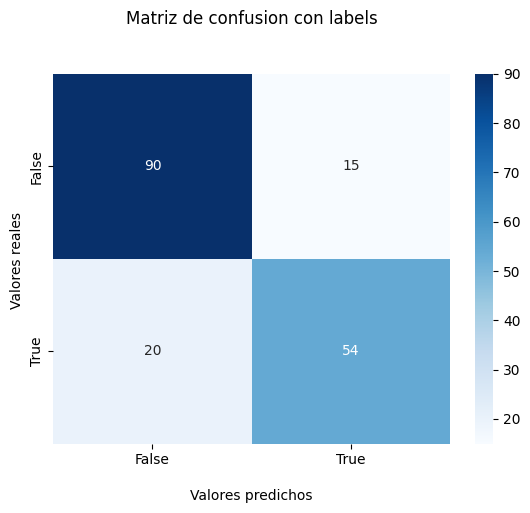

Matriz de Confusión:
[[90 15]
 [20 54]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Visualización de la matriz
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)


*   Verdaderos Positivos  (TP) : el modelo ha clasificado correctamente 54 instancias.
*   el modelo a clasificado 20 instancias como no sobrevivió cuando en realidad era sobrevivió.
*   Falsos positivos (FP) = 15: El modelo ha clasificado incorrectamente 15 instancias como 'Sobrevivió' cuando en realidad eran 'No sobrevivió'.
*   Verdaderos negativos (TN) = 90: El modelo ha clasificado correctamente 90 instancias como 'No sobrevivió'.






### **Regresión logística**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Paso 1: definir variables
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

#Paso 2: Dividir conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 3: Modelo regresión de regresión logística
logistic_model = LogisticRegression()

#Paso 4:  Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

#Paso 6: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo de Regresión Logística: {accuracy:.2f}')



Rendimiento del modelo de Regresión Logística: 0.81


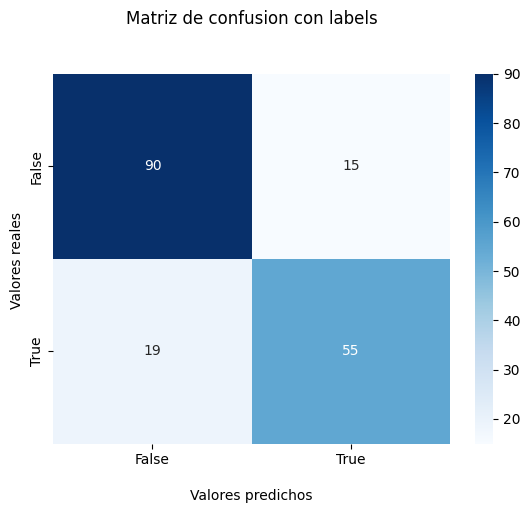

Matriz de Confusión:
[[90 15]
 [19 55]]


In [ ]:
#Visualizar en matriz de confusión

cm = confusion_matrix(y_test, y_pred)

#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)